Implementasi Approximation Theory di python

Disusun Oleh:

- Nino Ahmadiy (24083010049)
- Muhammad Rafly Wahyudi (24083010078)

# Approximation Theory Implementation

Inti dari approximation theory di contoh atas adalah penggunaan Chebyshev polynomial sebagai fungsi aproksimasi terhadap fungsi target 
f(x). Pendekatan ini memanfaatkan fakta bahwa polinomial Chebyshev memberi aproksimasi yang mendekati minimax, yaitu mengurangi osilasi maksimum di interval [−1,1]

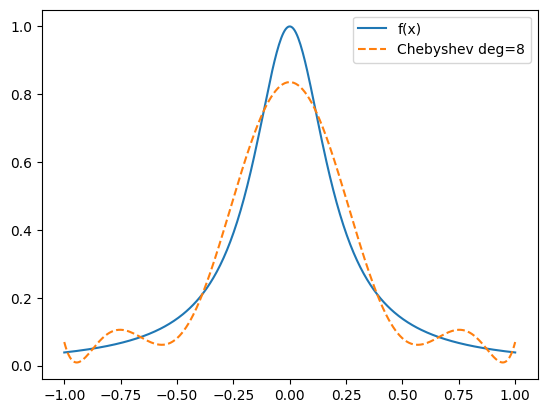

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Chebyshev

# target function
f = lambda x: 1/(1+25*x**2)

# sample points for visualization
xs = np.linspace(-1, 1, 400)

# fit Chebyshev polynomial of degree n
n = 8
# Chebyshev.fit uses least-squares on sample points internally; give dense nodes for stability
nodes = np.cos(np.linspace(0, np.pi, 200))  # Chebyshev nodes
vals = f(nodes)
cheb = Chebyshev.fit(nodes, vals, n, domain=[-1,1])

# evaluate
approx = cheb(xs)

# plot
plt.plot(xs, f(xs), label='f(x)')
plt.plot(xs, approx, '--', label=f'Chebyshev deg={n}')
plt.legend()
plt.show()


Pada contoh ini, fungsi f(x)=1/(1+25x2) didekati menggunakan polinomial Chebyshev derajat delapan pada interval [−1,1]. Metode ini memanfaatkan sifat dasar Chebyshev yang mampu mengurangi osilasi ekstrem yang sering muncul dalam polynomial interpolation biasa, sehingga aproksimasi menjadi lebih stabil dan merata. Dengan memetakan nilai fungsi pada titik Chebyshev dan melakukan fitting polinomial, diperoleh representasi polinomial yang mengikuti bentuk fungsi asli dengan kesalahan yang relatif kecil di seluruh interval. Visualisasi menunjukkan bahwa kurva hasil aproksimasi mengikuti pola fungsi target secara halus tanpa fluktuasi berlebih, menggambarkan bagaimana teori aproksimasi bekerja dalam memproduksi fungsi pendekatan yang efisien dan stabil.

# 1.1 Discreate Least Squares

Dasar dari discreate least squares adalah mencari polinomial p(x) yang meminimalkan jumlah kuadrat selisih antara data diskrit (xiyi) dan nilai aproksimasi p(xi).

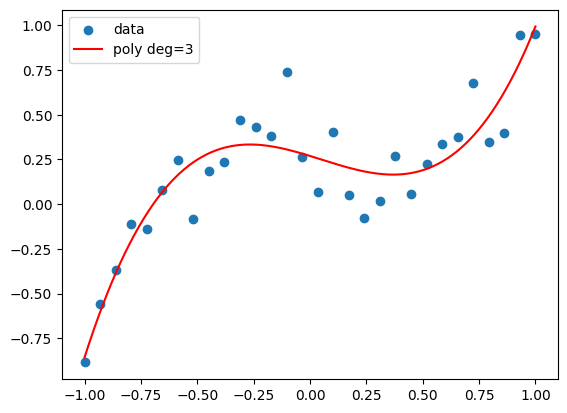

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# sample noisy data from a true function
x = np.linspace(-1,1,30)
y = 1.5*x**3 - 0.5*x + 0.2 + 0.2*np.random.randn(x.size)

# design matrix for polynomial degree m
m = 3
A = np.vander(x, N=m+1, increasing=False)  # columns: x^m ... x^0

# solve least squares
coeffs, *_ = np.linalg.lstsq(A, y, rcond=None)  # coeffs for x^m .. x^0

# evaluate
xs = np.linspace(-1,1,200)
ys_approx = np.polyval(coeffs, xs)

plt.scatter(x,y, label='data')
plt.plot(xs, ys_approx, 'r', label=f'poly deg={m}')
plt.legend()
plt.show()


Pada contoh ini, sejumlah titik data diskrit yang mengandung noise digunakan untuk membangun polinomial aproksimasi melalui metode least squares. Dengan membentuk matriks desain dari basis polinomial dan menyelesaikan sistem least squares, diperoleh polinomial derajat tiga yang secara optimal menyesuaikan pola data dengan meminimalkan error kuadrat total. Hasil visualisasi menunjukkan bahwa kurva aproksimasi mengalir mengikuti tren utama data sambil meredam fluktuasi acak, sehingga memberikan representasi yang lebih stabil dari hubungan antara variabel input dan output. Metode ini efektif ketika data terobservasi tidak sempurna dan membutuhkan fungsi pendekatan yang konsisten dengan pola keseluruhan.

In [7]:
X = 10,20
y = 2,2
degree = 1

np.polyfit(X, y, degree)

array([7.94410929e-17, 2.00000000e+00])

In [12]:
A = np.vstack([x, np.ones(len(x))])
np.linalg.lstsq(A,y)

C:\Users\MADEYZ\AppData\Local\Temp\ipykernel_29552\654462675.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  np.linalg.lstsq(A,y)


(array([-0.12043011, -0.10752688, -0.09462366, -0.08172043, -0.0688172 ,
        -0.05591398, -0.04301075, -0.03010753, -0.0172043 , -0.00430108,
         0.00860215,  0.02150538,  0.0344086 ,  0.04731183,  0.06021505,
         0.07311828,  0.08602151,  0.09892473,  0.11182796,  0.12473118,
         0.13763441,  0.15053763,  0.16344086,  0.17634409,  0.18924731,
         0.20215054,  0.21505376,  0.22795699,  0.24086022,  0.25376344]),
 array([], dtype=float64),
 2,
 array([5.47722558, 3.26950381]))

# 1.2 Contrinuous Least Squares 

Continuous least squares berangkat dari masalah mencari fungsi aproksimasi g(x) yang meminimalkan

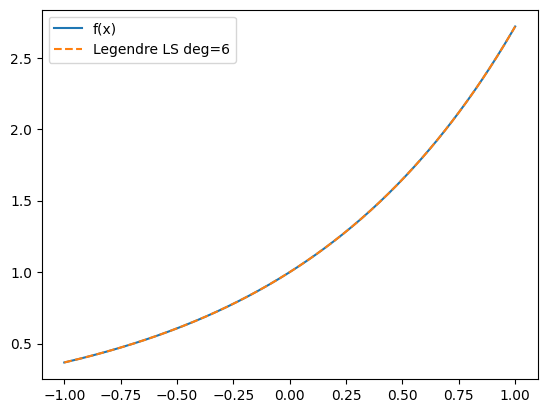

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import leggauss, Legendre

# target function
f = lambda x: np.exp(x)  # example on [-1,1]

# degree of approximation
N = 6

# Gaussian quadrature nodes+weights for accurate integration
nq = 50
nodes, weights = leggauss(nq)

# prepare Legendre polynomials and inner products
coeffs = np.zeros(N+1)
norms = np.zeros(N+1)
for k in range(N+1):
    Pk = Legendre.basis(k)         # Legendre polynomial P_k
    Pk_vals = Pk(nodes)
    f_vals = f(nodes)
    # inner products approximated by quadrature
    ip_f_pk = np.sum(weights * f_vals * Pk_vals)
    ip_pk_pk = np.sum(weights * Pk_vals * Pk_vals)
    coeffs[k] = ip_f_pk / ip_pk_pk
    norms[k] = ip_pk_pk

# build approximation as sum a_k P_k
xs = np.linspace(-1,1,300)
approx = sum(coeffs[k] * Legendre.basis(k)(xs) for k in range(N+1))

plt.plot(xs, f(xs), label='f(x)')
plt.plot(xs, approx, '--', label=f'Legendre LS deg={N}')
plt.legend()
plt.show()


Pada contoh ini, fungsi f(x)=e
 didekati dengan polinomial Legendre melalui metode continuous least squares. Dengan memanfaatkan sifat ortogonal basis Legendre serta integrasi numerik Gaussian, setiap koefisien aproksimasi dihitung secara langsung dari integral proyeksi, bukan dari titik sampel diskrit. Hasilnya adalah polinomial derajat enam yang mampu merepresentasikan bentuk fungsi asli secara halus di seluruh interval, dengan kesalahan global yang kecil dan terdistribusi merata. Pendekatan ini menunjukkan bagaimana continuous least squares menghasilkan aproksimasi yang lebih teoritis dan presisi tinggi dibandingkan pendekatan diskrit.

In [20]:
from scipy.integrate import simps

# Contoh fungsi asli dan Pendekatanya
f = lambda x:np.exp(x)
g = lambda x: 1 + x + (x**2)/2

x = np.linspace(0,2, 100)
error_squared = (f(x) - g(x))**2

E = simps(error_squared, x)
print("total squared error (E):", E)

total squared error (E): 1.3980732834941862


C:\Users\MADEYZ\AppData\Local\Temp\ipykernel_29552\540997624.py:10: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  E = simps(error_squared, x)


# 1.3 Orthogonal Polynomials 

Tujuan utamanya adalah membangun sekumpulan polinomial ortonormal pada interval tertentu dengan inner product (rumus di PPT)

In [4]:
import numpy as np
from numpy.polynomial.legendre import leggauss

def orthonormal_monomials(deg, a=-1, b=1, nq=80):
    nodes, weights = leggauss(nq)
    # map nodes from [-1,1] to [a,b]
    t = 0.5*(b-a)*nodes + 0.5*(b+a)
    w = weights * 0.5*(b-a)
    # monomials evaluated at quadrature nodes
    M = np.vstack([t**k for k in range(deg+1)])  # shape (deg+1, nq)
    orth = []
    for k in range(deg+1):
        v = M[k].copy()
        # subtract projections onto previous orthonormal vectors
        for u in orth:
            proj = np.sum(w * v * u)
            v = v - proj * u
        # normalize
        norm = np.sqrt(np.sum(w * v * v))
        if norm < 1e-14:
            raise ValueError("dependent vector encountered")
        orth.append(v / norm)
    # orth contains orthonormal functions sampled at quadrature nodes
    # return coefficients to evaluate phi_k(x) via interpolation on nodes if needed
    return np.array(orth), t, w

# example: get 4 orthonormal polynomials on [0,1]
orth, nodes, weights = orthonormal_monomials(4, a=0, b=1)
# orth[k] is samples of phi_k at quadrature nodes
# to evaluate at arbitrary x one could build interpolation, or recompute GS with different nodes
print("Shape orth:", orth.shape)


Shape orth: (5, 80)


Contoh ini menunjukkan bagaimana polinomial ortonormal dapat dibangun dari basis monomial standar melalui proses Gram–Schmidt dengan inner product integral. Dengan menghitung proyeksi dan normalisasi menggunakan Gaussian quadrature, setiap polinomial baru dijamin ortogonal terhadap polinomial sebelumnya di dalam interval yang ditentukan. Prosedur ini menghasilkan sekumpulan basis ortonormal yang cocok digunakan untuk aproksimasi fungsi, komputasi least squares kontinu, atau analisis numerik lainnya. Pendekatan ini memperlihatkan bagaimana orthogonal polynomials tidak harus diambil dari keluarga klasik seperti Legendre, tetapi bisa dibentuk langsung dari prinsip dasar ortogonalitas.